# Part 1: Getting the dataset

### Download the SFPD dataset and read the csv in Python

In [12]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import mpld3
from collections import Counter
import operator
import numpy as np
%matplotlib inline
# mpld3.enable_notebook()
from bokeh.plotting import figure, output_notebook, show
from bokeh.charts import Bar, output_file, show

In [13]:
# Define the data path
data_path = 'SFPD_data.csv'

In [14]:
# Create a function that reads a csv to a dictionary
def parse_csv(datafile):
    with open(datafile, 'rb') as sd:
        r = csv.DictReader(sd)
        data = [line for line in r]
    return data

In [15]:
# Or load it into a Dataframe using pandas
raw_file = pd.read_csv(data_path)
df = pd.DataFrame(raw_file)
df.head(5)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,150060275,NON-CRIMINAL,LOST PROPERTY,Monday,01/19/2015,14:00,MISSION,NONE,18TH ST / VALENCIA ST,-122.421582,37.761701,"(37.7617007179518, -122.42158168137)",15006027571000
1,150098210,ROBBERY,"ROBBERY, BODILY FORCE",Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821003074
2,150098210,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821004014
3,150098210,SECONDARY CODES,DOMESTIC VIOLENCE,Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821015200
4,150098226,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Tuesday,01/27/2015,19:00,NORTHERN,NONE,LOMBARD ST / LAGUNA ST,-122.431119,37.800469,"(37.8004687042875, -122.431118543788)",15009822628160


# Part 2 : Working with data

In [10]:
# But let's better work with dictionaries as we go forward
sfpd_dict = parse_csv(data_path)

NameError: name 'parse_csv' is not defined

In [11]:
# See how the dictionary looks like
sfpd_dict[:1]

NameError: name 'sfpd_dict' is not defined

### The types of crime and their popularity over time. The first field we'll dig into is the column "Category".

* *Create a set() of all the categories of crime in the dataset. How many are there?*

In [9]:
# Instead of set() we use unique of pandas
print 'The unique categories are: %d \n\nThey are the following: \n%s' % (
    len(df.Category.unique()), df.Category.unique())

The unique categories are: 39 

They are the following: 
['NON-CRIMINAL' 'ROBBERY' 'ASSAULT' 'SECONDARY CODES' 'VANDALISM'
 'BURGLARY' 'LARCENY/THEFT' 'DRUG/NARCOTIC' 'WARRANTS' 'VEHICLE THEFT'
 'OTHER OFFENSES' 'WEAPON LAWS' 'ARSON' 'MISSING PERSON'
 'DRIVING UNDER THE INFLUENCE' 'SUSPICIOUS OCC' 'RECOVERED VEHICLE'
 'DRUNKENNESS' 'TRESPASS' 'FRAUD' 'DISORDERLY CONDUCT'
 'SEX OFFENSES, FORCIBLE' 'FORGERY/COUNTERFEITING' 'KIDNAPPING'
 'EMBEZZLEMENT' 'STOLEN PROPERTY' 'LIQUOR LAWS' 'FAMILY OFFENSES'
 'LOITERING' 'BAD CHECKS' 'TREA' 'GAMBLING' 'RUNAWAY' 'BRIBERY'
 'PROSTITUTION' 'PORNOGRAPHY/OBSCENE MAT' 'SEX OFFENSES, NON FORCIBLE'
 'SUICIDE' 'EXTORTION']


* *Now count the number of occurrences of each category in the dataset. What is the most commonly occurring category of crime? What is the least frequently occurring?*

In [10]:
# Can be done with pandas with reset_index to turn Series into a dataframe
crime_occurences = df['Category'].groupby(df['Category']).count().sort_values(ascending=1).reset_index(name='count')
crime_occurences

,Category,count
0,TREA,13
1,PORNOGRAPHY/OBSCENE MAT,50
2,GAMBLING,326
3,"SEX OFFENSES, NON FORCIBLE",376
4,EXTORTION,669
5,BRIBERY,732
6,BAD CHECKS,891
7,FAMILY OFFENSES,1128
8,SUICIDE,1197
9,LOITERING,2382


* *Create a histogram over crime occurrences.*

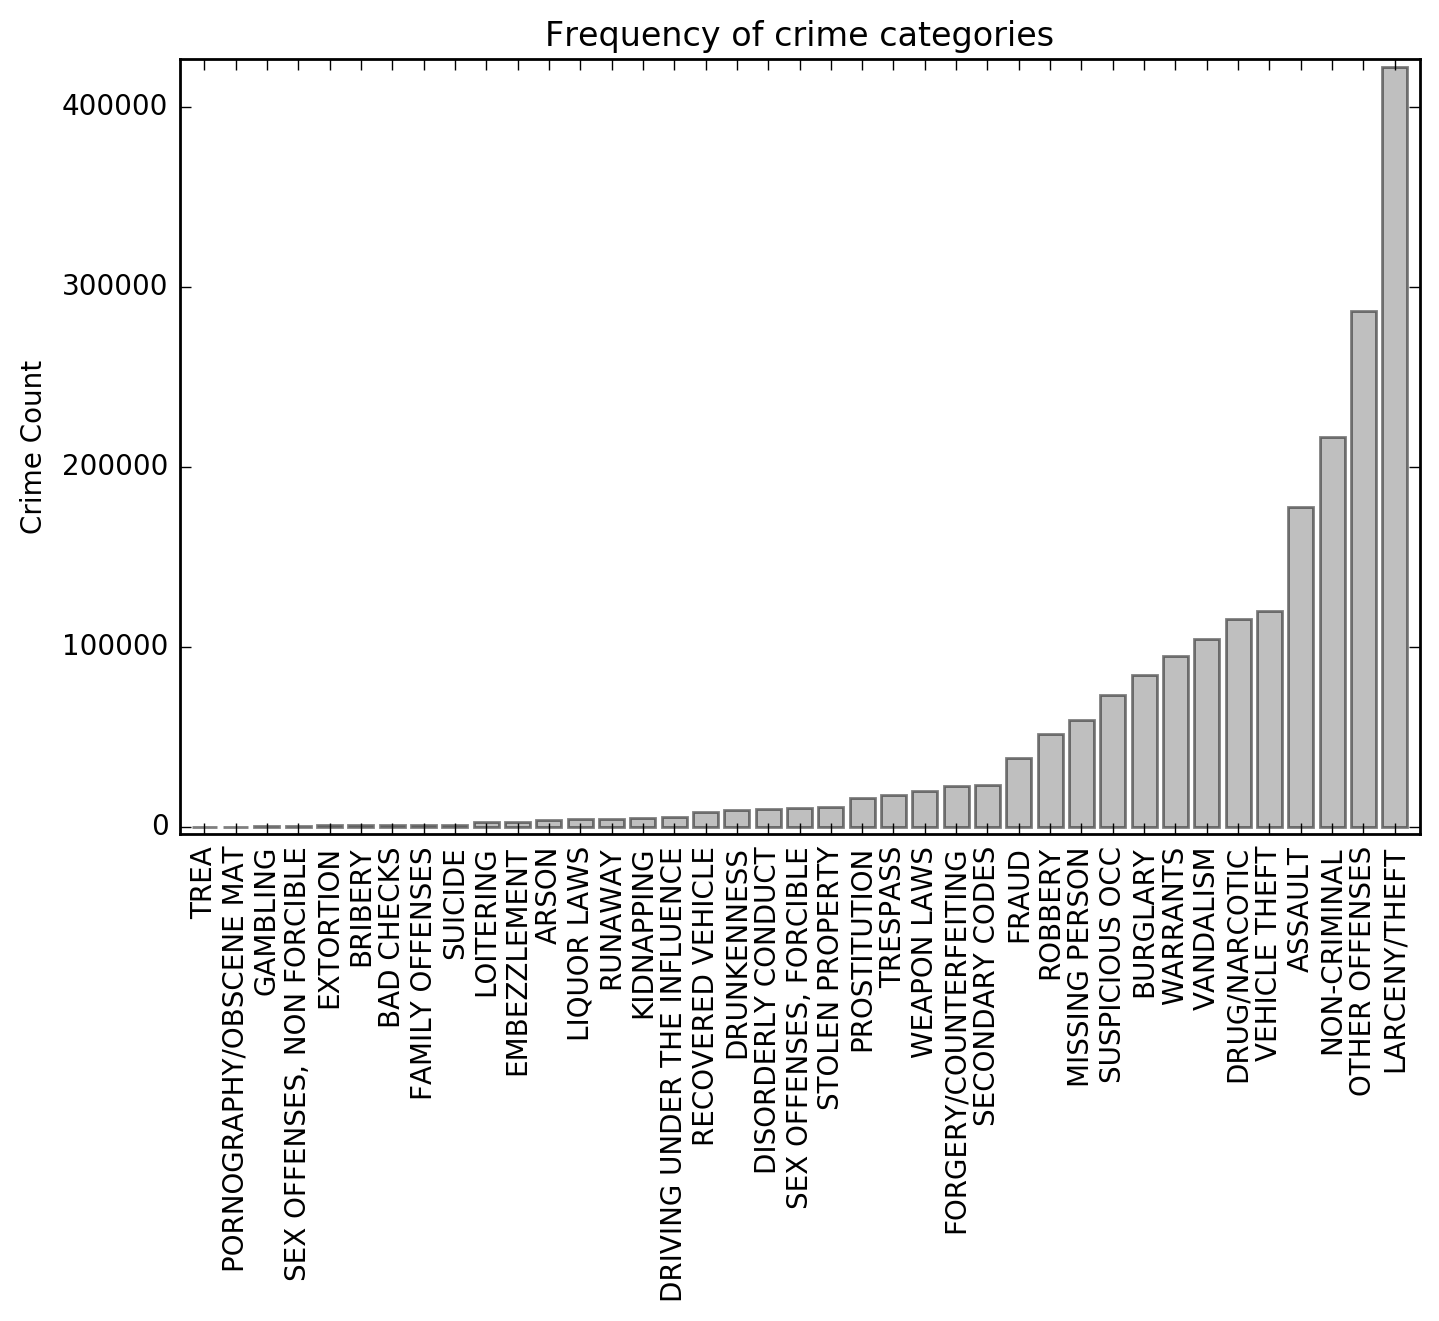

In [65]:
mpld3.disable_notebook()
%config InlineBackend.figure_format = 'retina'
# Assign x and y values
x = crime_occurences['Category']
y = crime_occurences['count']

# Give indeces to crimes
x_pos = np.arange(len(x))

# Assign the size of the plot before declaring the plot
plt.figure(figsize=(8, 5))

# Give the x and y values to the barplot
plt.bar(x_pos, y, align='center', color='grey', alpha=.5)

# Match the indeces with the correct courses and assign them to the x-axis
plt.xticks(x_pos, x, rotation='vertical')
plt.margins(0.01)

# Give labels and titles
plt.ylabel("Crime Count")
plt.title("Frequency of crime categories")

# Show the barplot
plt.show()

* *Now it's time to explore how the crime statistics change over time. To start off easily, let's count the number of crimes per year for the years 2003-2016 (the full years in the database). For that one, I used the date column in the CSV file and used year = int( date.split("/")[-1] ) to extract the year of each crime. What's the average number of crimes per year?*

In [19]:
# Turn Date into a datetime type instead of string
#df['Date'] = pd.to_datetime(df['Date'])

In [22]:
# Create a function that gets the date
def getYear(s):
    return int(s.split('/')[-1])

In [23]:
# Now create a new column named year and store the values of the above function
df['Year']= df['Date'].apply(lambda x: getYear(x))

In [24]:
# List the number of crimes per year
crime_occurences_time = df.groupby('Year')['Year'].count().reset_index(name='count').sort_values(by='Year', ascending=1)
crime_occurences_time

,Year,count
0,2003,149176
1,2004,148148
2,2005,142186
3,2006,137853
4,2007,137639
5,2008,141311
6,2009,139860
7,2010,133523
8,2011,132697
9,2012,140854


* *Police chief Suneman is interested in the temporal development of only a subset of categories, the so-called focus crimes. Those categories are listed below (for convenient copy-paste action). Now create bar-charts displaying the year-by-year development of each of these categories across the years 2003-2016.*

In [25]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

In [26]:
# Keep only the Categories of the list in a seperate dataframe
focus_df = df.filter(items=['Category', 'Year'])
focus_df = focus_df[focus_df['Category'].isin(focuscrimes)]
focus_df.head()

,Category,Year
1,ROBBERY,2015
2,ASSAULT,2015
4,VANDALISM,2015
7,VANDALISM,2015
8,BURGLARY,2015


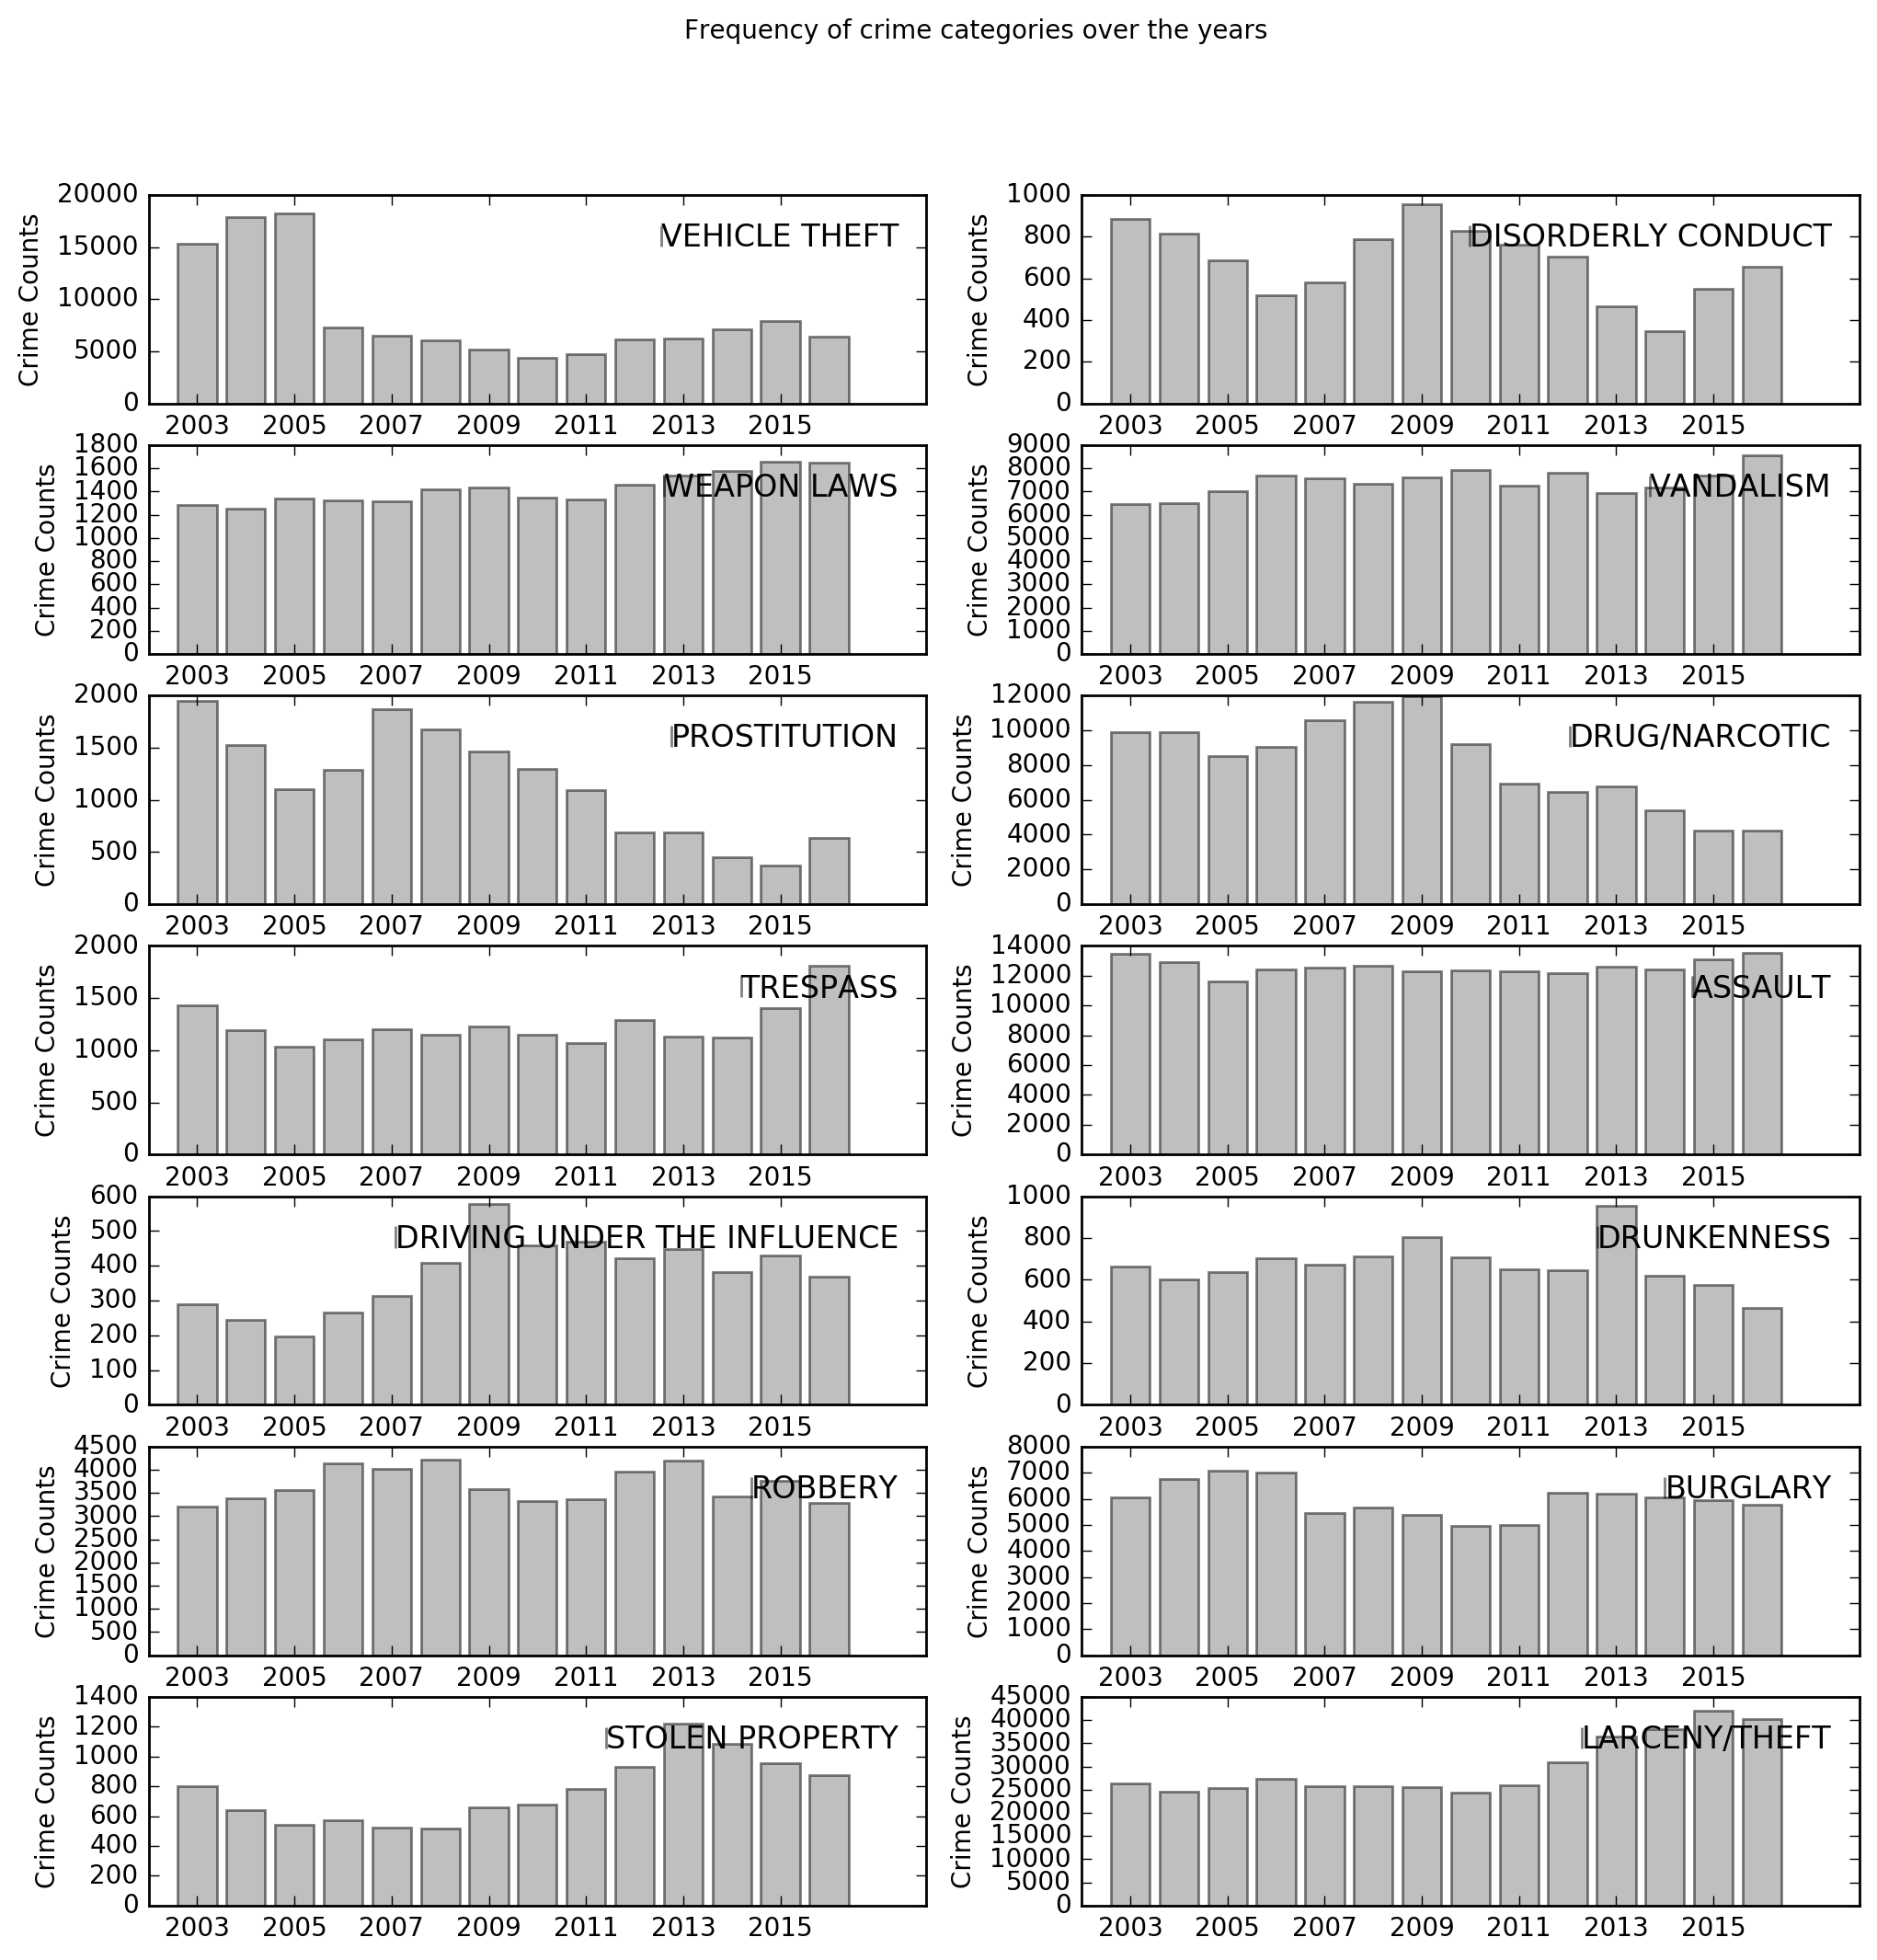

In [67]:
%config InlineBackend.figure_format = 'retina'
mpld3.disable_notebook()
plt.figure(figsize=(12, 12))
plt.suptitle('Frequency of crime categories over the years')
for index, crime in enumerate(focuscrimes):
    # Create a matrix of subplots with 7 rows and two columns
    plt.subplot(7, 2, index + 1)

    # Create a sub-df for each category
    temp_df = focus_df[focus_df['Category'] == crime]

    # Drop column category from the new df to keep only year
    temp_df = temp_df.drop('Category', axis=1)  # axis=1 means column

    # Drop 2017 as it could be misleading as only few values for the first two
    # months exist
    temp_df = temp_df[temp_df.Year != 2017]

    # Count frequency of crime occurence
    occurence = temp_df.groupby('Year')['Year'].count().reset_index(
        name='count').sort_values(by='Year', ascending=1)

    # Assign x and y values
    x = occurence['Year']
    y = occurence['count']

    plt.bar(x, y, align='center', alpha=.5, color='grey', label=crime)
    plt.xticks(np.arange(2003, 2017, 2))
    plt.ylabel("Crime Counts")
    plt.legend(loc='upper right', frameon=False,
               handlelength=0, handletextpad=0)
    #plt.title("Linear regression dataset %d" %(i+1))

# Show the barplot
plt.show()

* *Comment on at least three interesting trends in your plot. Also, here's a fun fact: The drop in car thefts is due to new technology called 'engine immobilizer systems' - get the full story here.*

### The types of crime and their popularity across the 24 hours of the day

* *First, plot a simple histogram of the number of crimes per hour in the dataset. This piece of information is in the Time column of the CSV file, and I simply used hr = int( time.split(":")[0] ) to get this info out. There's a little strange peak at 12:00 - what do you think is going on there? (No need for a serious exploration, just some thoughts on what might be going on).*

In [29]:
# Create a function that gets the time
def getHour(s):
    return int(s.split(':')[0])

In [30]:
# Now create a new column named hour and store the values of the above function
df['Hour'] = df['Time'].apply(lambda x: getHour(x))

In [31]:
# List the number of crimes per year
crime_occurences_hour = df.groupby('Hour')['Hour'].count().reset_index(
    name='count').sort_values(by='Hour', ascending=1)

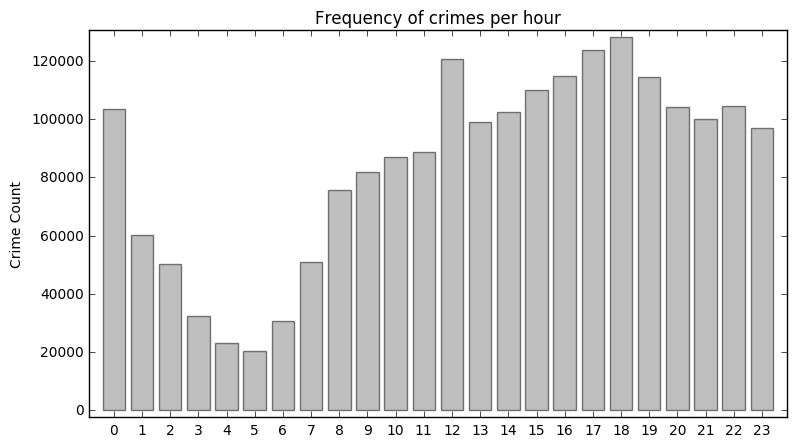

In [33]:
# Assign x and y values
x = crime_occurences_hour['Hour']
y = crime_occurences_hour['count']

# Assign the size of the plot before declaring the plot
plt.figure(figsize=(9, 5))

# Give the x and y values to the barplot
plt.bar(x, y, align='center', color='grey', alpha=.5)

# Give labels and titles
plt.ylabel("Crime Count")
plt.title("Frequency of crimes per hour")
plt.xticks(range(0, 24, 1))
plt.margins(0.02)

# Show the barplot
plt.show()

* *Next create a plot of the count of each crime category across the 24 hours of the day. Again, comment on at least three trends in the data. *

In [34]:
# Keep only the Categories of the list in a seperate dataframe
focus_df2 = df.filter(items=['Category', 'Hour'])
focus_df2 = focus_df2[focus_df2['Category'].isin(focuscrimes)]
focus_df2.head()

,Category,Hour
1,ROBBERY,15
2,ASSAULT,15
4,VANDALISM,19
7,VANDALISM,21
8,BURGLARY,16


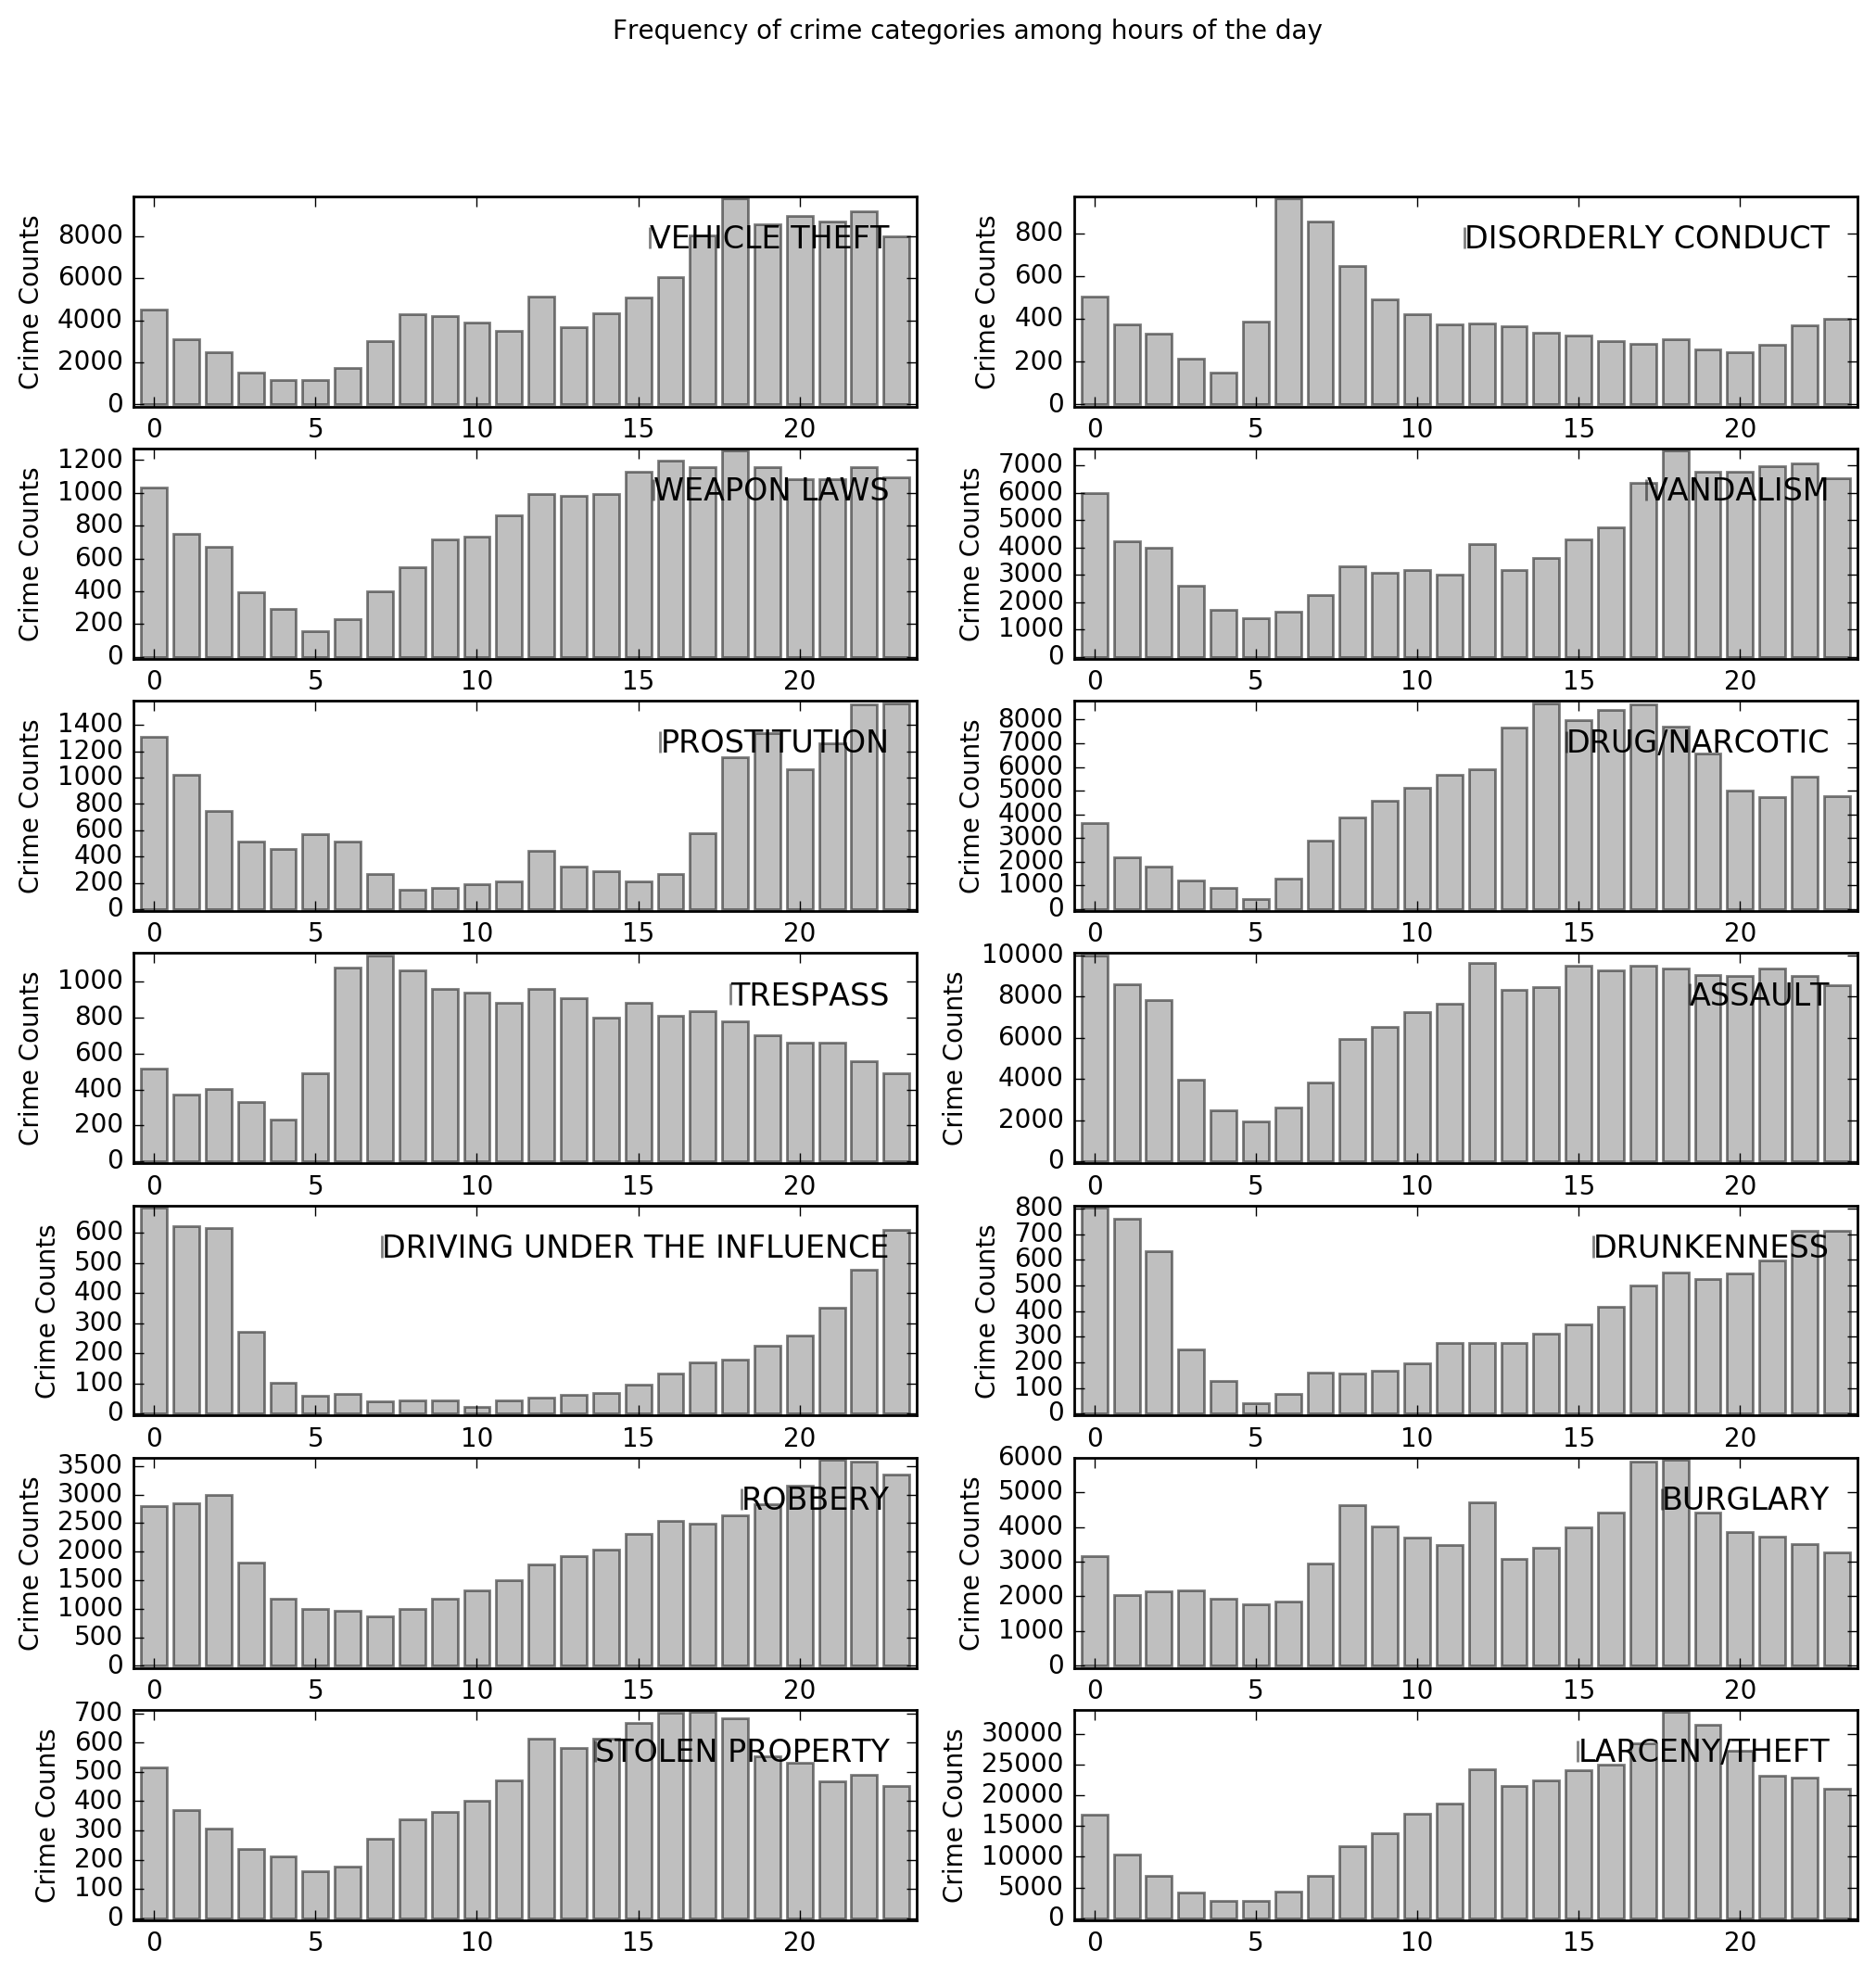

In [69]:
%config InlineBackend.figure_format = 'retina'
mpld3.disable_notebook()
plt.figure(figsize=(12, 12))
plt.suptitle('Frequency of crime categories among hours of the day')
for index, crime in enumerate(focuscrimes):
    # Create a matrix of subplots with 7 rows and two columns
    plt.subplot(7, 2, index + 1)

    # Create a sub-df for each category
    temp_df2 = focus_df2[focus_df2['Category'] == crime]

    # Drop column category from the new df to keep only year
    temp_df2 = temp_df2.drop('Category', axis=1)  # axis=1 means column

    # Drop 2017 as it could be misleading as only few values for the first two
    # months exist
    temp_df2 = temp_df2[temp_df2.Hour != 2017]

    # Count frequency of crime occurence
    occurence = temp_df2.groupby('Hour')['Hour'].count().reset_index(
        name='count').sort_values(by='Hour', ascending=1)

    # Assign x and y values
    x = occurence['Hour']
    y = occurence['count']

    plt.bar(x, y, align='center', alpha=.5, color='grey', label=crime)
    plt.xticks(np.arange(0, 24, 5))
    plt.ylabel("Crime Counts")
    plt.legend(loc='upper right', frameon=False,
               handlelength=0, handletextpad=0)
    plt.margins(0.01)
    #plt.title("Linear regression dataset %d" %(i+1))

# Show the barplot
plt.show()

### The types of crime and how they take place across San Francisco's police districts.

* *So now we'll be combining information about PdDistrict and Category to explore differences between SF's >neighborhoods. First, simply list the names of SF's 10 police districts.*

In [36]:
# Create a list of unique values of districts excluding nulls
districts = [i for i in df.PdDistrict.unique() if pd.notnull(i)]
print 'The %d police districts of SanFrancisco are: \n%s' % (len(districts), districts)

The 10 police districts of SanFrancisco are: 
['MISSION', 'TENDERLOIN', 'NORTHERN', 'RICHMOND', 'BAYVIEW', 'CENTRAL', 'PARK', 'TARAVAL', 'SOUTHERN', 'INGLESIDE']


* *Which has the most crimes? Which has the most focus crimes?*

In [37]:
# Keep only the Category and the District column
catdist_df = df.filter(items=['Category', 'PdDistrict'])
catdist_df = catdist_df[catdist_df['PdDistrict'].isin(districts)]

# List the number of crimes per District
crime_occurences_district = catdist_df.groupby('PdDistrict')['PdDistrict'].count(
).reset_index(name='count').sort_values(by='count', ascending=0)

# Print the district with the most crimes
print 'The districts with the most crimes are:\n'
crime_occurences_district = crime_occurences_district.reset_index().drop('index',
                                                                         axis=1)
crime_occurences_district[:5]

The districts with the most crimes are:



,PdDistrict,count
0,SOUTHERN,364516
1,MISSION,273386
2,NORTHERN,246991
3,BAYVIEW,203841
4,CENTRAL,202342


In [38]:
# Filter out only the focus crimes
catdistfocus_df = catdist_df[catdist_df['Category'].isin(focuscrimes)]

# List the number of crimes per District
crime_occurences_district_focus = catdistfocus_df.groupby('PdDistrict')[
    'PdDistrict'].count().reset_index(name='count').sort_values(by='count', ascending=0)

# Print the district with the most focus crimes
print 'The districts with the most focus crimes are:\n'
crime_occurences_district_focus = crime_occurences_district_focus.reset_index(
).drop('index', axis=1)
crime_occurences_district_focus[:5]

The districts with the most focus crimes are:



,PdDistrict,count
0,SOUTHERN,208888
1,NORTHERN,157664
2,MISSION,151657
3,CENTRAL,125981
4,BAYVIEW,107768


* *Next, we want to generate a slightly more complicated graphic. I'm interested to know if there are certain crimes >that happen much more in certain neighborhoods than what's typical. Below I describe how to get that plot going:*

> First, we need to calculate the relative probabilities of seeing each type of crime in the dataset as a whole. > That's simply a normalized version of this plot. Let's call it P(crime)

In [39]:
# Create one more column with the relative probability of seeing each type of crime
crime_occurences['P(crime)'] = crime_occurences['count']/crime_occurences['count'].sum()
crime_occurences[:5]

,Category,count,P(crime)
0,TREA,13,0.000006
1,PORNOGRAPHY/OBSCENE MAT,50,0.000025
2,GAMBLING,326,0.000161
3,"SEX OFFENSES, NON FORCIBLE",376,0.000186
4,EXTORTION,669,0.000331


In [40]:
# Create one more column with the relative probability of seeing each type of crime
crime_occurences_district['P(district)'] = crime_occurences_district['count']/
                                           crime_occurences_district['count'].sum()
crime_occurences_district[:5]

,PdDistrict,count,P(district)
0,SOUTHERN,364516,0.180109
1,MISSION,273386,0.135081
2,NORTHERN,246991,0.122039
3,BAYVIEW,203841,0.100719
4,CENTRAL,202342,0.099978


> *Next, we calculate that same probability distribution but for each PD district, let's call that P(crime|district).*

In [41]:
# Keep only the Categories and the Districts in a seperate dataframe
df3 = df.filter(items=['Category', 'PdDistrict'])

# List the number of crimes per District per Category
crime_occurences_mix = df3.groupby(
    ['PdDistrict', 'Category']).size().reset_index(name='count')

# Create two more columns with the count per district(count_x) and the
# probability(P(crime|district))
crime_occurences_mix = pd.merge(crime_occurences_mix.groupby('PdDistrict')['count'].sum().reset_index(),
                                crime_occurences_mix,
                                on='PdDistrict',
                                how='outer')
crime_occurences_mix['P(crime|district)'] = crime_occurences_mix['count_y'] / 
                                            crime_occurences_mix['count_x']
crime_occurences_mix[:5]

,PdDistrict,count_x,Category,count_y,P(crime|district)
0,BAYVIEW,203841,ARSON,911,0.004469
1,BAYVIEW,203841,ASSAULT,22572,0.110733
2,BAYVIEW,203841,BAD CHECKS,71,0.000348
3,BAYVIEW,203841,BRIBERY,140,0.000687
4,BAYVIEW,203841,BURGLARY,8915,0.043735


> *Now we look at the ratio P(crime|district)/P(crime). That ratio is equal to 1 if the crime occurs at the same level within a district as in the city as a whole. If it's greater than one, it means that the crime occurs more frequently within that district. If it's smaller than one, it means that the crime is rarer within the district in question than in the city as a whole.*

In [42]:
# Merge the two tables created above to do the calculation
df_final = pd.merge(crime_occurences_mix, crime_occurences,
                    on='Category', how='outer')
df_final = df_final.drop(['count_x', 'count_y', 'count'], axis=1)  # auto-created

# Create a new column with the Ratio
df_final['Ratio'] = df_final['P(crime|district)'] / df_final['P(crime)']

# Sort by District
df_final = df_final.sort_values(by='PdDistrict').reset_index().drop('index', axis=1)
df_final.head(5)

,PdDistrict,Category,P(crime|district),P(crime),Ratio
0,BAYVIEW,ARSON,0.004469,0.001741,2.566684
1,BAYVIEW,SUSPICIOUS OCC,0.043725,0.036068,1.212313
2,BAYVIEW,BURGLARY,0.043735,0.041513,1.053523
3,BAYVIEW,SUICIDE,0.000368,0.000591,0.622096
4,BAYVIEW,DISORDERLY CONDUCT,0.002541,0.004730,0.537244


> *For each district plot these ratios for the 14 focus crimes.*

In [43]:
# Filter out all those lines not included in the 14 focus crimes
df_final_focus = df_final[df_final['Category'].isin(focuscrimes)]
df_final_focus.head(5)

,PdDistrict,Category,P(crime|district),P(crime),Ratio
2,BAYVIEW,BURGLARY,0.043735,0.041513,1.053523
4,BAYVIEW,DISORDERLY CONDUCT,0.002541,0.004730,0.537244
5,BAYVIEW,STOLEN PROPERTY,0.004410,0.005381,0.819637
7,BAYVIEW,DRIVING UNDER THE INFLUENCE,0.002105,0.002620,0.803355
11,BAYVIEW,ROBBERY,0.029258,0.025531,1.145968


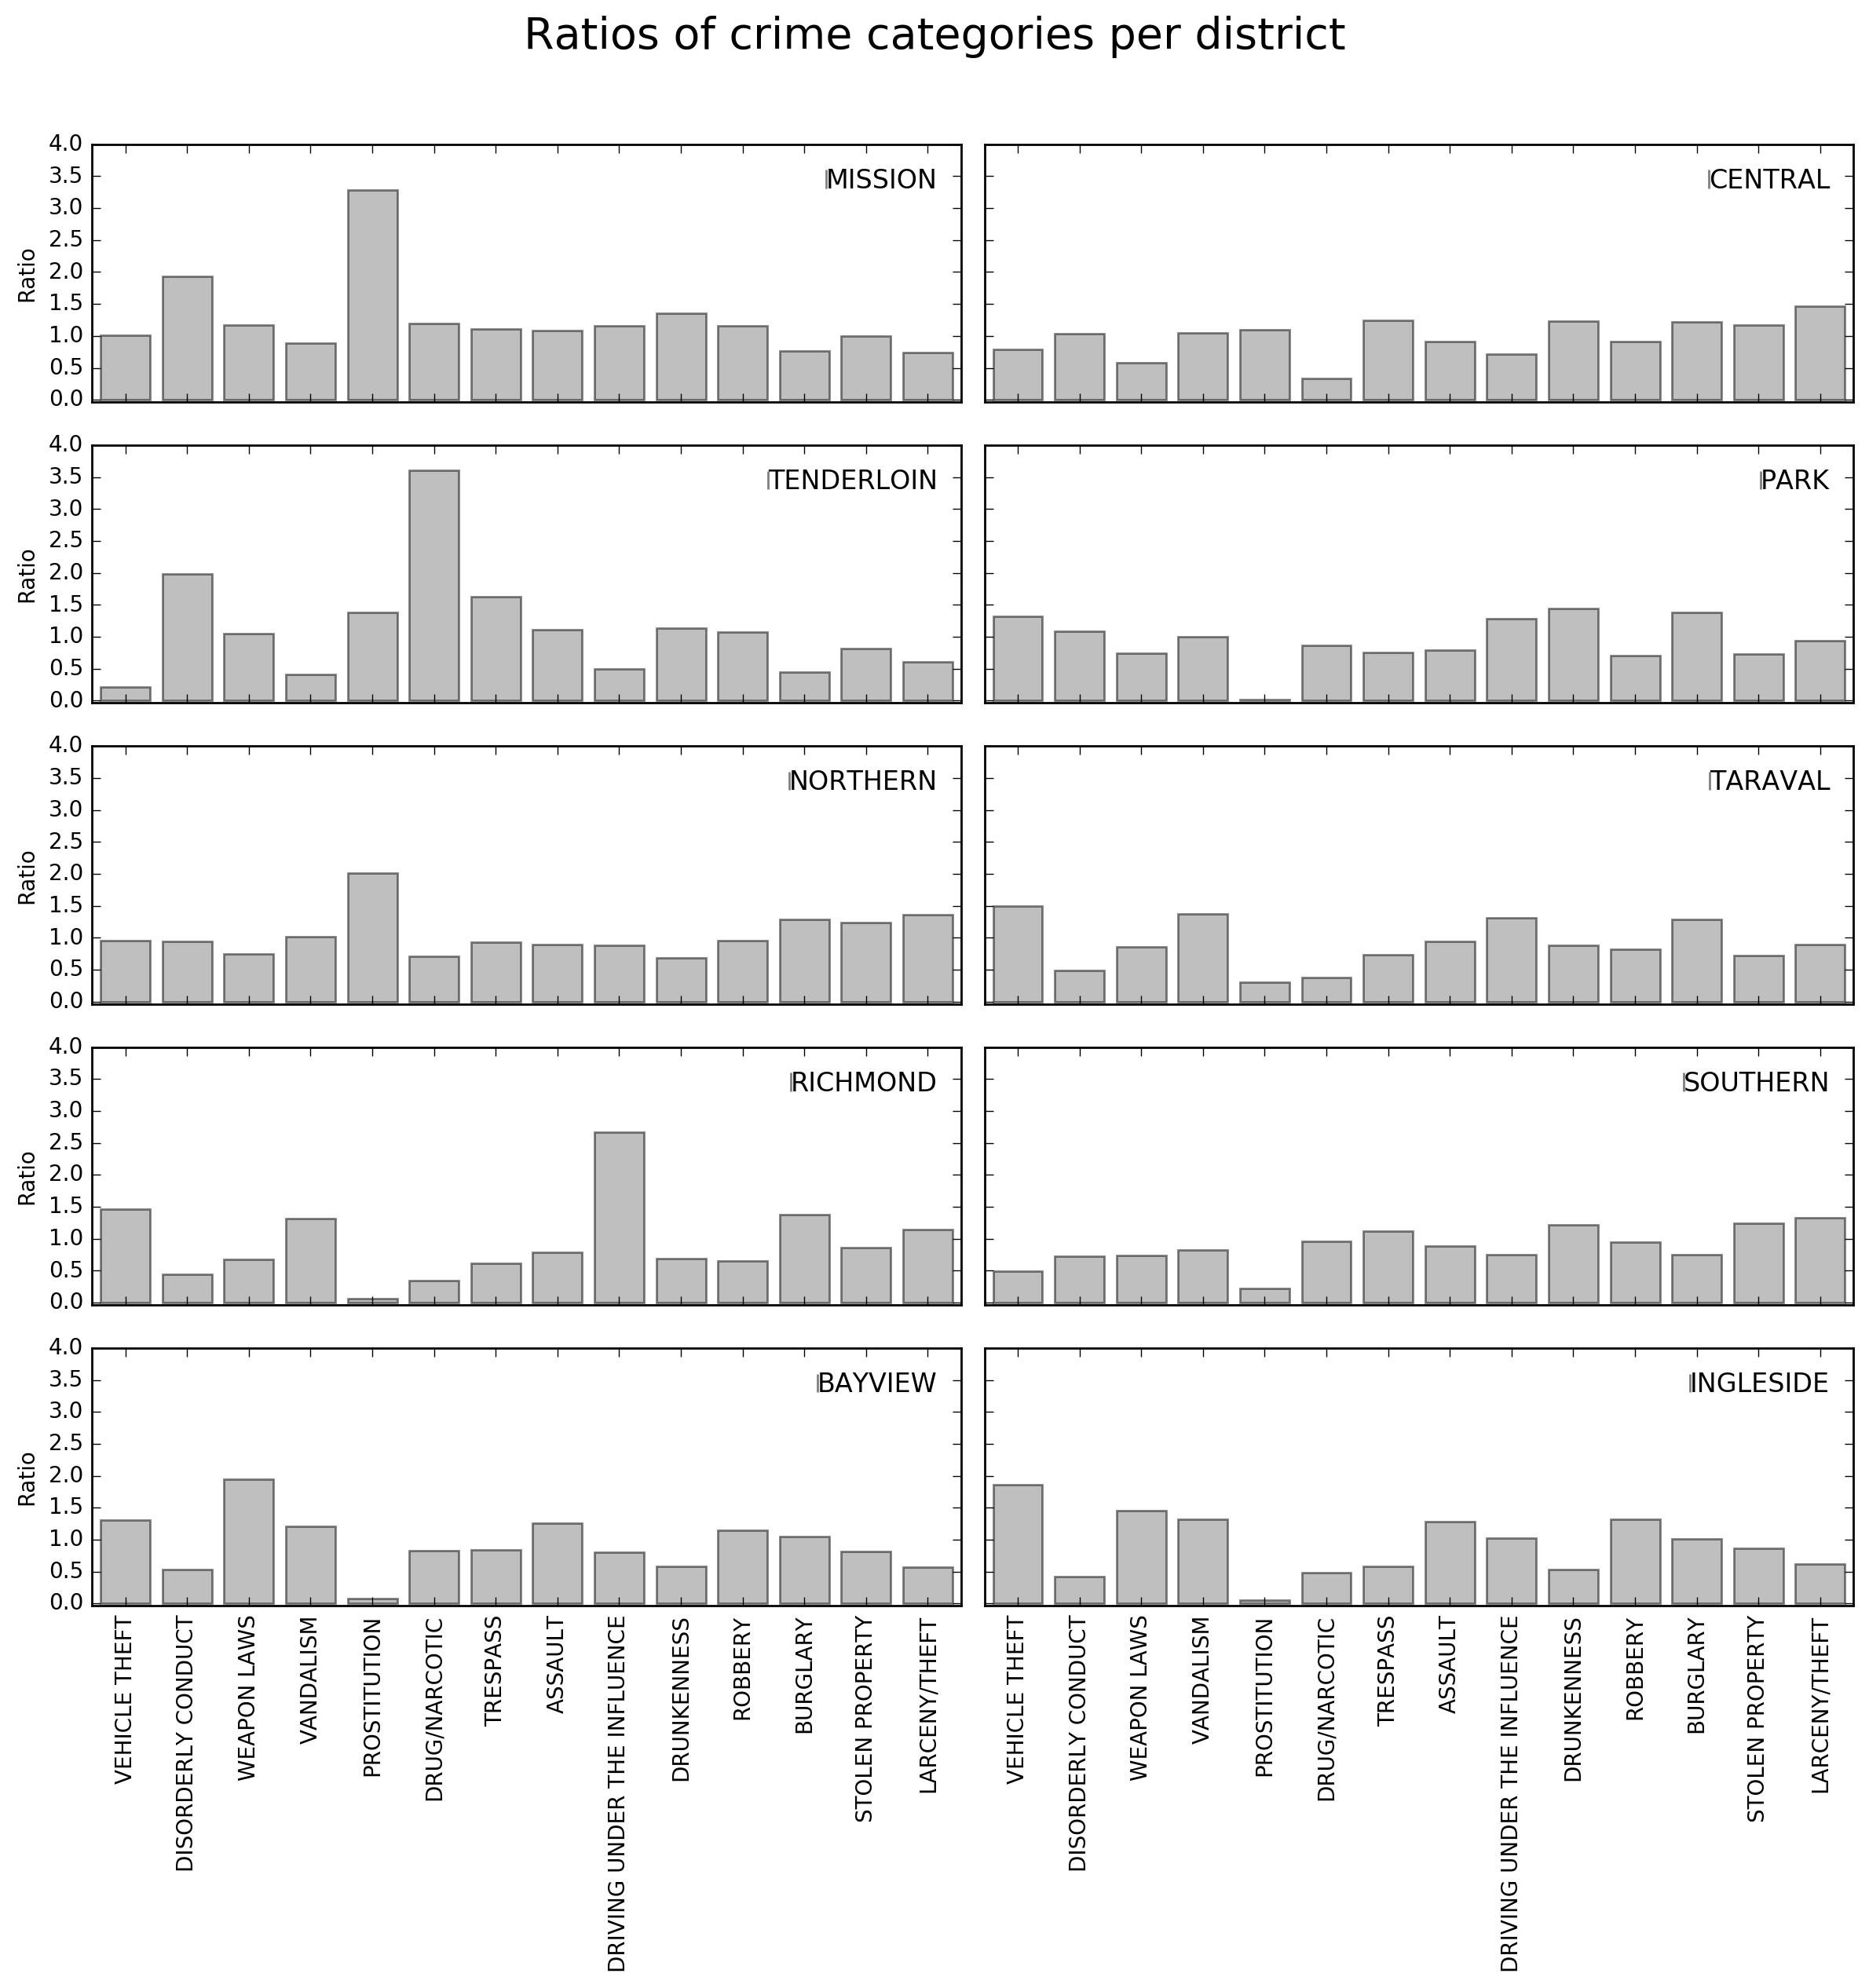

In [70]:
%config InlineBackend.figure_format = 'retina'
mpld3.disable_notebook()
# Assign variables to axes and figure
fig, ax = plt.subplots(nrows=5, ncols=2, sharex=True, sharey=True, figsize=(12, 12))

# Assign the size and the Super title
fig.suptitle('Ratios of crime categories per district', fontsize=20, y=1.05)

for index,district in enumerate(districts):
    # Create a sub-df for each category
    temp_df3 = df_final_focus[df_final_focus['PdDistrict']==district]
    
    # Drop columns to minimize the memory usage(optional)
    temp_df3 = temp_df3.drop(['PdDistrict','P(crime)','P(crime|district)'], axis=1) # axis=1 means column
    
    # Assign x
    x = list(focuscrimes)
    # Give indeces to crimes
    x_pos = np.arange(len(x))
    
    # Assign y and keep the same sorting for each plot
    mapping = {crime:i for i,crime in enumerate(x)}
    key = temp_df3['Category'].map(mapping)
    temp_df3 = temp_df3.iloc[key.argsort()]
    y = temp_df3['Ratio']
    
    # Assign x and y to subplots                   
    subindex = 0
    # Index < 5 means left column else right column
    if index < 5:      
        # Create an ax object
        ax_temp =  ax[index][subindex]
        # Feed the ax object with the x and y values
        ax_temp.bar(x_pos,y,align='center',alpha=.5, color='grey',label=district)
        ax_temp.legend(loc='upper right',frameon=False,handlelength=0, handletextpad=0)
        ax_temp.margins(0.01)
        # Set the rotation to vertical
        for tick in ax_temp.get_xticklabels():
            tick.set_rotation(90)
        # Set Ratio label only in the left column
        ax_temp.set_ylabel("Ratio")
        #plt.xticks(x_pos, x, rotation='vertical')
    else:
        # Create an ax object
        ax_temp =  ax[index-5][subindex+1]
        # Feed the ax object with the x and y values
        ax_temp.bar(x_pos,y,align='center',alpha=.5, color='grey',label=district)
        ax_temp.legend(loc='upper right',frameon=False,handlelength=0, handletextpad=0)
        ax_temp.margins(0.01)
        # Set the rotation to vertical
        for tick in ax_temp.get_xticklabels():
            tick.set_rotation(90)
    
    # Set xticks and yticks parameters
    plt.setp(ax, xticks=x_pos, xticklabels=x,yticks=np.arange(0,4.5,0.5)) 
    
# Show the barplot
fig.tight_layout()
plt.show()

> *Comment on the top crimes in Tenderloin, Mission, and Richmond. Does this fit with the impression you get of these neighborhoods on Wikipedia?*

> *Even though we only plotted the ratios for our 14 focus crimes, I asked you to calculate the ratios based on all crime categories. Why do you think I wanted to include all crime types in the calculation?*

# Part 4: A little bit of plotting

In [17]:
!jupyter nbconvert --template=nbextensions --to=html Week_3.ipynb

Traceback (most recent call last):
  File "/usr/local/bin/jupyter-nbconvert", line 11, in <module>
    sys.exit(main())
  File "/usr/local/lib/python2.7/site-packages/jupyter_core/application.py", line 267, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/usr/local/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python2.7/site-packages/nbconvert/nbconvertapp.py", line 293, in start
    self.convert_notebooks()
  File "/usr/local/lib/python2.7/site-packages/nbconvert/nbconvertapp.py", line 447, in convert_notebooks
    self.exporter = cls(config=self.config)
  File "/usr/local/lib/python2.7/site-packages/nbconvert/exporters/templateexporter.py", line 151, in __init__
    super(TemplateExporter, self).__init__(config=config, **kw)
  File "/usr/local/lib/python2.7/site-packages/nbconvert/exporters/exporter.py", line 101, in __init__
    self._init_preprocesso